In [1]:
import gym
import torch
import torch.nn as nn
import torch.nn.functional as F
from IPython.display import HTML

In [2]:
"""
env = gym.make('LunarLander-v2')
env = gym.wrappers.Monitor(env, "./gym-results", force=True)

for _ in range(10):
    env.reset()
    done = False
    while not done:
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
env.close()
"""

'\nenv = gym.make(\'LunarLander-v2\')\nenv = gym.wrappers.Monitor(env, "./gym-results", force=True)\n\nfor _ in range(10):\n    env.reset()\n    done = False\n    while not done:\n        action = env.action_space.sample()\n        observation, reward, done, info = env.step(action)\nenv.close()\n'

In [3]:
"""
import io
import base64
from IPython.display import HTML

video = io.open('./gym-results/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))
"""

'\nimport io\nimport base64\nfrom IPython.display import HTML\n\nvideo = io.open(\'./gym-results/openaigym.video.%s.video000000.mp4\' % env.file_infix, \'r+b\').read()\nencoded = base64.b64encode(video)\nHTML(data=\'\'\'\n    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>\'\'\'\n.format(encoded.decode(\'ascii\')))\n'

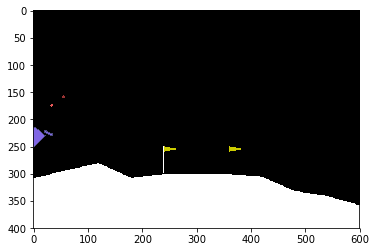

In [4]:
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('LunarLander-v2')
#env.reset()
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
for _ in range(2):
    env.reset()
    done = False
    while not done:
        img.set_data(env.render(mode='rgb_array')) # just update the data
        display.display(plt.gcf())
        display.clear_output(wait=True)
        action = env.action_space.sample()
        s_, r, done, i = env.step(action)
env.close()

In [13]:
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

In [14]:
import gym

env_name_label = widgets.Label('Environment name: ')

env_name = widgets.Dropdown(
    options=['LunarLander-v2', 'CartPole-v0', 'MountainCar-v0'],
    value='LunarLander-v2',
    #description='Env name:',
    disabled=False,
)

mem_fill_eps_label = widgets.Label('Memory Fill Epochs: ',
                                    #layout=widgets.Layout(width='auto', grid_area='mem_fill_eps_label')
                                    #layout=widgets.Layout(width='auto', height='auto')
                                  )

mem_fill_eps = widgets.IntSlider(
    value=10,
    min=0,
    max=1000,
    step=10,
    #description='Memory fill epochs:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    #style={'description_width': '130px'}
    #layout=widgets.Layout(width='auto', grid_area='mem_fill_eps')
    #layout=widgets.Layout(width='auto', height='auto')
)

train_eps_label = widgets.Label('Train Epochs: ',
                                #layout=widgets.Layout(width='auto', grid_area='train_eps_label')
                                #layout=widgets.Layout(width='auto', height='auto')
                               )

train_eps = widgets.IntSlider(
    value=1000,
    min=100,
    max=3000,
    step=100,
    #description='Train epochs:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    #layout=widgets.Layout(width='auto', grid_area='train_eps')
    #layout=widgets.Layout(width='auto', height='auto')
)
                                

display(env_name_label)
#display(mem_fill_eps)
#display(widgets.HBox([widgets.Label('Memory Fill Epochs'), mem_fill_eps]))
#display(train_eps)
#display(widgets.HBox([widgets.Label('Train Epochs'), train_eps]))

Label(value='Environment name: ')

In [15]:
widgets.GridBox(children=[env_name_label, env_name, mem_fill_eps_label, mem_fill_eps, train_eps_label, train_eps],
        layout=widgets.Layout(
            width='50%',
            grid_template_rows='auto auto',
            grid_template_columns='30% 70%')
       )

GridBox(children=(Label(value='Environment name: '), Dropdown(options=('LunarLander-v2', 'CartPole-v0', 'Mount…

In [16]:
print(env_name.value, mem_fill_eps.value, train_eps.value)

LunarLander-v2 10 1000


In [17]:
import time

def train_loop(b, max_count):
    progress_bar = widgets.IntProgress(min=0, max=max_count) # instantiate the bar
    progress_label = widgets.Label("")
    #display(f) # display the bar
    display(widgets.HBox([progress_bar, progress_label]))

    count = 0
    while count <= max_count:
        progress_bar.value += 1 # signal to increment the progress bar
        progress_label.value = "{}/{}".format(progress_bar.value, max_count)
        time.sleep(.1)
        count += 1

In [12]:
import functools

#max_count=train_eps.value
#max_count = 10

#train_loop(max_count)

#train_btn = widgets.Button(description="Train")
#train_btn = widgets.Label("yo")
#print(train_btn)
#display(widgets.HBox([train_btn]))

#button_next = widgets.Button(description="Next")
#print(type(button_next))
#button_prev = widgets.Button(description="Prev")
#display(env_name)



#train_btn.on_click(functools.partial(train_loop, max_count=train_eps.value))


<class 'ipywidgets.widgets.widget_button.Button'>


TypeError: 'module' object is not callable